# Generation of Figures and Statistics

In [1]:
import pandas as pd


In [175]:
nccr_df = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/NCCR_combined_corpus_DE_wording_available_prep.csv')

## Figures

### Number of Texts per Country & Party (NCCR_DF)

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [164]:
#Sort by country
nccr_df = nccr_df[['party', 'Sample_Country']]
# Rename partys 
nccr_df["party"].replace({"fpo": "FPÖ",     
                          "ovp": "ÖVP",
                          "teamstronach": "Team Stronach",
                          "neos": "NEOS",
                          "spo": "SPÖ",
                          "bzo": "BZÖ",
                          "lif": "LIF",
                          "sp": "SP",
                          "gps": "GRÜNE Schweiz",  
                          "svp": "SVP",
                          "evp": "EVP",
                          "bdp": "BDP",
                          "cvp": "CVP",
                          "glp": "glp",
                          "edu": "EDU",
                          "afd": "AfD",
                          "cdu": "CDU",
                          "spd": "SPD",
                         "dielinke": "Die Linke",
                         "npd": "NPD",
                         "csu": "CSU"},                       
                         inplace=True)

# Rename parties present in multiple countries
nccr_df.loc[(nccr_df.Sample_Country == 'de') & (nccr_df.party == 'fdp') , 'party'] = "FDP"
nccr_df.loc[(nccr_df.Sample_Country == 'cd') & (nccr_df.party == 'fdp') , 'party'] = "FDP.Die Liberalen"
nccr_df.loc[(nccr_df.Sample_Country == 'de') & (nccr_df.party == 'grune') , 'party'] = "Bündnis 90/Die Grünen"
nccr_df.loc[(nccr_df.Sample_Country == 'au') & (nccr_df.party == 'grune') , 'party'] = "GRÜNE"
nccr_df.loc[(nccr_df.Sample_Country == 'cd') & (nccr_df.party == 'grune') , 'party'] = "GRÜNE Schweiz"

# drop nan
nccr_df.dropna(subset=['party'])


# Rename countries
nccr_df["Sample_Country"].replace({"au": "Austria",   
                         "cd": "Switzerland",
                        "de": "Germany"},                       
                         inplace=True)

nccr_df.sort_values(['Sample_Country', 'party'], inplace=True)
nccr_df.rename(columns={'Sample_Country': 'Country'}, inplace=True)


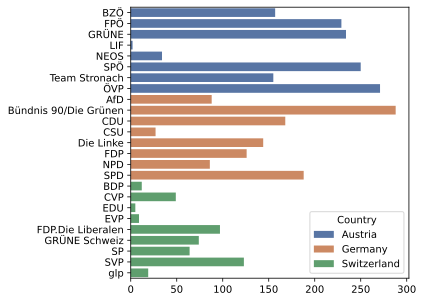

In [165]:
# Number of speeches per country & party
plt.figure(figsize=(5,5))
sns.countplot(y="party", hue='Country', data=nccr_df, dodge=False, palette="deep").set( xlabel='', ylabel='')

plt.savefig('parties_nccr_df.svg')


## Statistics

In [198]:
list(nccr_df)

['ID',
 'text',
 'Coder',
 '#TS',
 '#TS2',
 'Codierstart_Lab',
 'Medium',
 'Author',
 'Author_ID',
 'Date',
 'Length',
 'TS_Beginning',
 'TS_End',
 'Images',
 'Position',
 'Genre',
 'Main_Issue',
 'Frame_HI_face',
 'Frame_HI_indi',
 'Frame_HI_emoN',
 'Frame_HI_emoP',
 'Frame_Con_disa',
 'Frame_Con_repr',
 'Frame_Con_winn',
 'Frame_Con_slant',
 'Frame_PRF_conduit',
 'Frame_PRF_context',
 'Frame_PRF_interp',
 'Frame_PRF_account',
 'Frame_Neg_tone',
 'Frame_Neg_scep',
 'Frame_Neg_other',
 'Bemerkungen',
 'Count_Speaker',
 'Count_Issues',
 'Count_ActEval',
 'STYLE_Negativ',
 'STYLE_Emot',
 'T_Brutto',
 'T_Break',
 'T_Netto',
 'T_H',
 'Sessiontext',
 'Session_ID',
 'Sample',
 'Sample_Country',
 'Sample_Lang',
 'Sample_Type',
 'Weight',
 'Filter_Coded',
 'STYLE_Colloquial',
 'STYLE_Casual',
 'STYLE_Facts',
 'STYLE_Sense',
 'STYLE_BlackWhite',
 'STYLE_Sarcasm',
 'STYLE_Drama',
 'STYLE_EmoTone',
 'STYLE_CommMan',
 'STYLE_UsThem',
 'STYLE_Privat',
 'STYLE_Coll_pos',
 'STYLE_Coll_neg',
 'STYLE_E

In [227]:
#  Get number of tokens in Fulltext and Wording_Segment
import spacy
spacy_model='de_core_news_lg'
nlp_sent = spacy.load(spacy_model, exclude=['tagger', 'morphologizer', 'parser',
                                                         'attribute_ruler', 'lemmatizer'])
nlp_sent.add_pipe("sentencizer")

# Prepare
nccr_df['doc_text'] = list(nlp_sent.pipe(nccr_df['text_prep']))
nccr_df['doc_segment'] = list(nlp_sent.pipe(nccr_df['wording_segments']))



In [228]:
# Get number of tokens
def get_tokens(x):
    tokens = [token.text for token in x] 
    return len(tokens)


In [229]:
nccr_df['text_tokens'] = nccr_df['doc_text'].apply(lambda x: get_tokens(x))
nccr_df['segment_tokens'] = nccr_df['doc_segment'].apply(lambda x: get_tokens(x))

In [230]:
nccr_df.describe()

,#TS,#TS2,Medium,Author,Author_ID,Length,TS_Beginning,TS_End,Images,Position,Genre,Frame_HI_face,Frame_HI_indi,Frame_HI_emoN,Frame_HI_emoP,Frame_Con_disa,Frame_Con_repr,Frame_Con_winn,Frame_Con_slant,Frame_PRF_conduit,Frame_PRF_context,Frame_PRF_interp,Frame_PRF_account,Frame_Neg_tone,Frame_Neg_scep,Frame_Neg_other,Count_Speaker,Count_Issues,Count_ActEval,STYLE_Negativ,STYLE_Emot,T_Brutto,T_Break,T_Netto,T_H,Sessiontext,Weight,Filter_Coded,STYLE_Colloquial,STYLE_Casual,STYLE_Facts,STYLE_Sense,STYLE_BlackWhite,STYLE_Sarcasm,STYLE_Drama,STYLE_EmoTone,STYLE_CommMan,STYLE_UsThem,STYLE_Privat,STYLE_Coll_pos,STYLE_Coll_neg,STYLE_Emph,POPULIST,POPULIST_PeopleCent,POPULIST_AntiElite,POPULIST_Sovereign,POPULIST_Advocative,POPULIST_Conflictive,ANTIPOPULIST,APOPULIST_PeopleCent,APOPULIST_AntiElite,APOPULIST_Sovereign,APOPULIST_Advocative,APOPULIST_Conflictive,LW_Attack,Migrants_Mentioned,Migrants_Neg,Migrants_Pos,Iss_Heartland,Iss_Migration,Iss_Labor,Iss_Social,Iss_Labreg_Pro,Iss_Labreg_Con,Iss_Labreg_Neut,Iss_Migres_Pro,Iss_Migres_Con,Iss_Migres_Neut,Spr_attacked,Spr_praised,Spr_agreed,Spr_disagreed,Spr_attacked_J,Spr_praised_J,Spr_agreed_J,Spr_disagreed_J,Iss_Pos_differ,Iss_Pos_contra,Iss_Pos_differ_J,Iss_Pos_contra_J,Tgt_differ,Tgt_differ_J,Challenged,Challenged_J,Usual_Suspect,On_Migration,On_Labor,AE_Total,PC_Total,RS_Total,AE_Emph,AE_Unchall,PC_Emph,PC_Unchall,RS_Emph,RS_Unchall,AE_Mig,AE_Mig_Emph,AE_Mig_Unchall,AE_Mig_Pro,AE_Mig_Con,PC_Mig,PC_Mig_Emph,PC_Mig_Unchall,PC_Mig_Pro,PC_Mig_Con,RS_Mig,RS_Mig_Emph,RS_Mig_Unchall,RS_Mig_Pro,RS_Mig_Con,Mig_Con,Mig_Con_Emph,Mig_Con_Unchall,Mig_Neut,Mig_Neut_Emph,Mig_Neut_Unchall,Mig_Pro,Mig_Pro_Emph,Mig_Pro_Unchall,AE_Lab,AE_Lab_Emph,AE_Lab_Unchall,PC_Lab,PC_Lab_Emph,PC_Lab_Unchall,RS_Lab,RS_Lab_Emph,RS_Lab_Unchall,Lab_Con,Lab_Con_Emph,Lab_Con_Unchall,Lab_Neut,Lab_Neut_Emph,Lab_Neut_Unchall,Lab_Pro,Lab_Pro_Emph,Lab_Pro_Unchall,POP_Total,POP_Unchall,POP_Emph,Spr_ID,year,match_count,Wording_sent_count,Unnamed: 0,ID_non,segment_tokens,text_tokens
count,3.455000e+03,3.455000e+03,3455.000000,3455.000000,3455.000000,3455.000000,0.0,0.0,0.0,3455.000000,3455.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.0,3455.000000,3455.0,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.0,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.00000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,12.000000,12.000000,3455.000000,3455.000000
mean,1.426608e+09,1.426611e+09,2623.091751,2.000289,13782.615340,561.947902,NaN,NaN,NaN,96.833864,16.559768,0.099455,0.625341,0.2

In [239]:
# Get rows without party
nccr_df.party.isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49       True
50       True
51       True
52       True
53       True
54       True
55       True
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70       True
71    

In [243]:
df = nccr_df[nccr_df['party'].isna()]
df.Sample_Type

49      Past_PartyMan
50      Past_PartyMan
51      Past_PartyMan
52      Past_PartyMan
53      Past_PartyMan
54      Past_PartyMan
55      Past_PartyMan
56      Past_PartyMan
57      Past_PartyMan
58      Past_PartyMan
59      Past_PartyMan
60      Past_PartyMan
61      Past_PartyMan
62      Past_PartyMan
63      Past_PartyMan
64      Past_PartyMan
65      Past_PartyMan
66      Past_PartyMan
67      Past_PartyMan
68      Past_PartyMan
69      Past_PartyMan
70      Past_PartyMan
71      Past_PartyMan
198     Past_PartyMan
199     Past_PartyMan
200     Past_PartyMan
201     Past_PartyMan
202     Past_PartyMan
203     Past_PartyMan
204     Past_PartyMan
205     Past_PartyMan
214     Past_PartyMan
215     Past_PartyMan
216     Past_PartyMan
217     Past_PartyMan
218     Past_PartyMan
219     Past_PartyMan
220     Past_PartyMan
221     Past_PartyMan
222     Past_PartyMan
223     Past_PartyMan
224     Past_PartyMan
225     Past_PartyMan
226     Past_PartyMan
227     Past_PartyMan
228     Pa

In [255]:
df.loc[49].text

'Text ID:\nau_pm_el_02_50001.txt\n\nParty Manifesto: SPÖ (Austria) - National Elections 2002\n-------------------------------------\n\n\nFaire Chancen fuer alle!\n\n26 Projekte fuer die Zukunft Oesterreichs\n\nProgramm der Sozialdemokratischen Partei Oesterreichs fuer die Jahre 2003 bis 2006\n\nEinleitung zum Spitzenreiter beim Anstieg der Arbeitslosigkeit geworden.\n\n- Oesterreich hat nach zweieinhalb Jahren Regierung Schuessel ein im europaeischen Vergleich erschreckend geringes Wirtschaftswachstum. Unter den 15 EU-Laendern belegt Oesterreich nur mehr den vorletzten Platz.\n- Die ArbeitnehmerInnen, die PensionistInnen und auch die Wirtschaft leiden nach ueber 30 Belastungsmassnahmen der Regierung Schuessel unter der hoechsten Steuer- und Abgabenlast seit 1945. Die versprochene Steuerreform ist ausgeblieben.\n- Die Oesterreicherinnen und Oesterreicher koennen sich heute auch deshalb weniger leisten als frueher, weil ihre Einkommen seit Antritt dieser Regierung kaum noch steigen.\n\nO

In [261]:
nccr_df.loc[nccr_df.Sample_Type == 'Past_PartyMan'].iloc[100].text

'Text ID:\nau_pm_el_83_50014.txt\n\nParty Manifesto: SPÖ (Austria) - National Elections 2983\n-------------------------------------\n\nDie Lebensqualitaet verbessern\n\nWenn in Zeiten wie diesen die Wirtschaftspolitik und dabei vor allem die Sicherung der Arbeitsplaetze im Zentrum aller politischen Ueberlegungen steht, heisst das nicht, dass die wichtigen Fragen der Lebensqualitaet vernachlaessigt werden duerfen. Im Gegenteil:\nSie stehen mit der wirtschaftlichen Entwicklung in engem Zusammenhang. So ist etwa die Beschaeftigungswirksamkeit umweltpolitischer Massnahmen laengst bewiesen. Die Schaffung und Verbesserung von Wohnraum sichert ebenfalls Arbeitsplaetze. Gesundheitspolitische Massnahmen, etwa die Vorsorgemedizin, ersparen Milliarden an Kosten fuer die Volkswirtschaft. Die Politik der Arbeitsplatzsicherung steht also nicht im Gegensatz zu einer Politik der Verbesserung der Lebensqualitaet. Beide Bereiche sind untrennbar miteinander verbunden und ergaenzen einander.\n\nUmwelt sch

In [252]:
nccr_df.iloc[3].text

'Text ID:\nau_pm_el_02_10007.txt\n\nParty Manifesto, FPÖ (Asutria) 2002\n\n----------------\n\nBILDUNG/SCHULE. \n\nDAS ERBE. \nVor Eintritt der FPOe in die Bundesregierung hinkte die oesterreichische Bildungspolitik der Schulrealitaet weit hinterher: Es gab ein Defizit an konkreten paedagogischen Reformmodellen, wenig Demokratisierung an den Schulen, stark hierarchische Strukturen, abhaengig vom politischen Einfluss der Parteien, fehlgeleitete Schuelerstroeme, eine Hauptschule, die zur ?Restschule? mutierte etc. Schule wurde nicht als umfassender Lebensraum begriffen, wo fachliche, persoenliche und soziale Kompetenzen vermittelt werden und Leistung anerkannt wird. \n\nUNSER ZIEL. \nZentrale freiheitliche Forderung war daher der Ausbau der Schule zu einem Bildungsunternehmen. Erklaertes Ziel der FPOe ist es die Leistungsbereitschaft sowie Begabungen zu foerdern, Schueler mit Leistungsschwaechen zu unterstuetzen, die Schulverwaltung zu entbuerokratisieren und die Qualitaet der Schulen du